# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

### **Semana 6**
#### **Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**

# **Parte-1: Perceptrón Multicapa**

Recordemos que la red neuronal multicapa es válida para modelos de recresión y de clasificación. 

Puedes consultar la docuemntación correspondiente en cada caso:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# Generemos algunos datos aleatoriamente.
# Nos regresa los datos de entrada X, los varlores reales de la variable de salida 
# y los valores reales de los coeficientes del modelo lineal generado.

X, y, cc = make_regression(n_samples=10000,    # total de observaciones a generar
                          n_features=10,      # número de factores a generar, tanto informativos, como redundantes
                          n_informative=4,    # número de factores informativos o independientes a generar
                          noise=0.5,          # desviación estándar del ruido gaussiano agregado a la variable de salida.
                          coef=True,          # nos regresa los coeficientes reales del modelo subyacente generado.
                          random_state=0      # semilla
                          )


print(X.shape, y.shape)

(10000, 10) (10000,)


In [3]:
# Coeficientes reales:
cc

array([ 0.        , 39.0479674 ,  0.        ,  0.        ,  0.        ,
       91.1615477 , 85.97273915, 79.15856985,  0.        ,  0.        ])

Es decir, en este caso la importancia de los factores estarán asociados a las columnas de estos factores no cero. 

Y en cuanto mayor la magnitud del coeficiente, mayor su importancia, aunque esto puede variar, ya que dependerá del modelo de la partición ralizada del conjunto de datos.

In [4]:
Xtv, X_test, ytv, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(8000, 10) (2000, 10) (2000, 10) (8000,) (2000,) (2000,)


Para la documentación de métricas:

https://scikit-learn.org/stable/modules/model_evaluation.html


In [5]:
# Generemos l
values = [i for i in range(5, 20, 2)]

# Generemos nuestras propia lista de resultados para nuestras propias curvas de aprendizaje:
train_mapes, val_mapes = list(), list()
train_mses, val_mses = list(), list()            


for i in values:

  # Veamos cómo se comporta la MLP con el número de 
  # neuronas en una o varias capas ocultas....
   

  ii = round((i+1)/2.)
  #modelo_MLP = MLPRegressor(hidden_layer_sizes=(i,), 
  modelo_MLP = MLPRegressor(hidden_layer_sizes=(i, i),     # número de capas ocultas y nodos en cada capa.
                            max_iter=20000,                # máximo número de iteraciones para el proceso de convergencia.
                            alpha=0.0001,                  # constante asociado al término de regularización L2.
                            solver='adam',                 # técnica de optimización.
                            learning_rate_init=0.001       # valor inicial del tamaño de paso con relación a "adam" o "sgd".
                            )  

  modelo_MLP.fit(X_train, y_train)

  # MSE-rrores del Train:
  train_yhat = modelo_MLP.predict(X_train)
  train_mse = mean_squared_error(y_train, train_yhat)          
  train_mses.append(train_mse)  

  # MSE-errores del Validation:
  val_yhat = modelo_MLP.predict(X_val)
  val_mse = mean_squared_error(y_val, val_yhat)          
  val_mses.append(val_mse)  

   # ####################

  # MAPE-errores del Train:
  train_yhat = modelo_MLP.predict(X_train)
  train_mape = mean_absolute_percentage_error(y_train, train_yhat)          
  train_mapes.append(train_mape)  

  # MPE-errores del Validation:
  val_yhat = modelo_MLP.predict(X_val)
  val_mape = mean_absolute_percentage_error(y_val, val_yhat)          
  val_mapes.append(val_mape) 


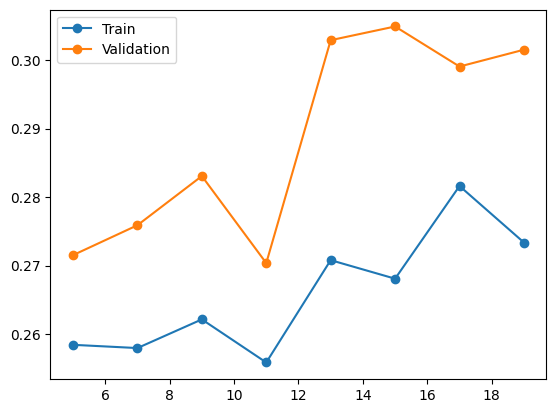

In [6]:
# Errores de train y validaton MSE 
plt.plot(values, train_mses, '-o', label='Train')
plt.plot(values, val_mses, '-o', label='Validation')
plt.legend()
plt.show()

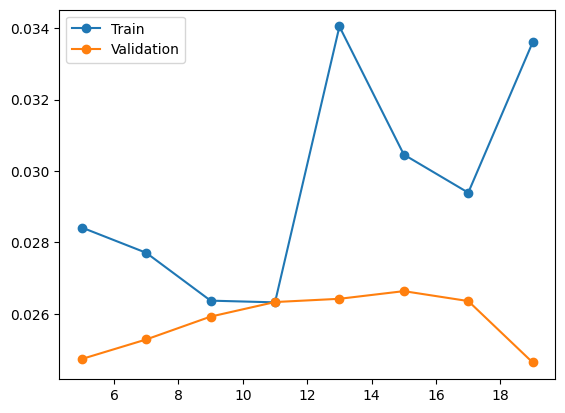

In [7]:
# Errores de train y validaton MAPE 
plt.plot(values, train_mapes, '-o', label='Train')
plt.plot(values, val_mapes, '-o', label='Validation')
plt.legend()
plt.show()

Cada tipo de error nos dice la cantidad de neurones a utilizar en cada capa.

# **Importancia de Factores (Feature Importance)**

https://scikit-learn.org/stable/modules/permutation_importance.html

In [8]:
from sklearn.inspection import permutation_importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.12823
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.69559
Feature: 6, Score: 0.60811
Feature: 7, Score: 0.51892
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


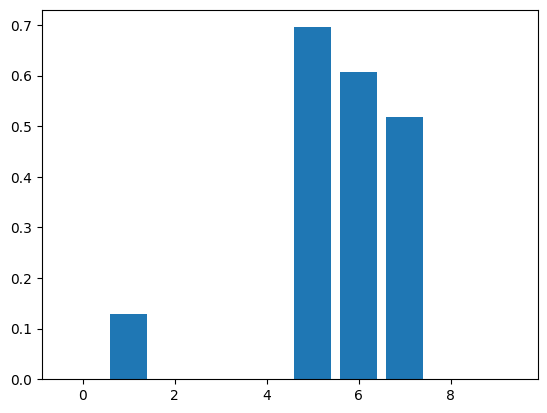

In [9]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:

modelo_MLP = MLPRegressor(hidden_layer_sizes=(11,11), 
                            max_iter=20000, 
                            alpha=0.0001,
                            learning_rate_init=0.001)  

modelo_MLP.fit(X_train, y_train)

importance = permutation_importance(modelo_MLP, X_train, y_train, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

### **Fin de los ejemplos de la semana 7**